In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats, mean
import seaborn as sns
import random
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
work_dir = '/Users/tuk12127/Google_Drive/olson_lab/projects/relationship_knowledge/fMRI_task/relationship_selection'
os.chdir(work_dir)


dim_rel = pd.read_csv('../../surveys/lit_dimensions_all_relationships/results/dim_rel.csv', index_col=0)
dim_rel_t = dim_rel.T


relationships = dim_rel_t.index.tolist()
dimensions = dim_rel_t.columns.tolist()

wish_rels = pd.read_csv('../../surveys/wish_replication_all_relationships/survey_1_relationships.csv')
wish_rels.drop(7, inplace=True)
wish_rels.reset_index(drop=True)

,Relationships
0,Parent – Child
1,Parent – Teenager
2,Wife – Husband
3,Fiance – Fiancee
4,Between Siblings
5,Between divorced spouses
6,Between a person and their in-laws
7,Employer – Employee
8,Interviewer – Job applicant
9,Guard – Prisoner


### Term definitions:
    rel = relationships
    KS stat = the statistic derived from the one-sample Kolmogorov-Smirnov test
    Greedy level = the maximum number of items (relationships) that will be used
    to find the final KS stat

## Greedy Approach
### Use Wish relationships as seeds, compare to actual dimension distributions from the whole dataset (159 relationships)

In [4]:
"""greedy_step_rels = wish_rels['Relationships'].tolist()
greedy_step_rels = [s.replace('\u2013', '-') for s in greedy_step_rels]
greedy_step_rels = [s.replace('\xe2\x80\x93', '-') for s in greedy_step_rels]
#greedy_step_rels = [s.replace('–', '-') for s in greedy_step_rels]


# Matrix that stores mean KS stat for a given seed and greedy level
greedy_mtx = pd.DataFrame(np.nan, columns=range(26,160),
                               index=['mean','all','p-value'], dtype=object)
# The relationships that were choosen in a "greedy" manner
greedy_rels_mtx = pd.DataFrame(np.nan, columns = range(26,160),index = ['Wish Relationships'])


# Exclude seed and rels that have already been selected
other_rels = [x for x in relationships if x not in greedy_step_rels]
#count = 1
high_means = []
all_pvals = []
for step in range(26,160):  # Loop through increasing greedy levels
    #greedy_norm_mtx[str(max_step)] = np.nan
    #greedy_rels_mtx[str(max_step)] = np.nan
    prev_mean = 1
    for rel in other_rels:
        greedy_step_kstat = []
        greedy_step_pval = []
        temp_rels = greedy_step_rels + [rel]
        for dim in dimensions:  # Calc the KS stat for each dimension
            temp_mean, temp_pval = stats.ks_2samp(dim_rel_t.loc[temp_rels,dim],dim_rel_t[dim])
            #greedy_step_kstat.append(stats.ks_2samp(dim_rel_t.loc[temp_rels,dim],dim_rel_t[dim])[0])
            #greedy_step_pval.append(stats.ks_2samp(dim_rel_t.loc[temp_rels,dim],dim_rel_t[dim])[1])
            greedy_step_kstat.append(temp_mean)
            greedy_step_pval.append(temp_pval)
        # Find the average KS stat of all dimensions
        greedy_step_kstat_avg = mean(greedy_step_kstat)   
        greedy_step_pval_avg = mean(greedy_step_pval)
        # Check to see if the current added rel normalizes better than a prev rel
        if greedy_step_kstat_avg < prev_mean:
            prev_mean = greedy_step_kstat_avg
            low_rel = rel
            low_mean = greedy_step_kstat_avg
            low_all = greedy_step_kstat
            pval = greedy_step_pval_avg
            
        # Select the rel that best contributes to a normal distribution
        #   This is the greedy selection
        if rel == other_rels[-1]:
            break
    greedy_step_rels.append(low_rel)
    high_means.append(low_mean)
    all_pvals.append(pval)
    other_rels = [x for x in relationships if x not in greedy_step_rels]
    greedy_mtx[step].iloc[0] = low_mean
    greedy_mtx[step].iloc[1] = low_all[:]
    greedy_mtx[step].iloc[2] = pval
    greedy_rels_mtx[step].iloc[0] = greedy_step_rels[:]
    print(step)
        #count = count 


#greedy_mtx.to_csv('greedy_mtx.csv')
#greedy_rels_mtx.to_csv('greedy_rel_mtx_wish_orig.csv')
"""

'greedy_step_rels = wish_rels[\'Relationships\'].tolist()\ngreedy_step_rels = [s.replace(\'\\u2013\', \'-\') for s in greedy_step_rels]\ngreedy_step_rels = [s.replace(\'\xe2\x80\x93\', \'-\') for s in greedy_step_rels]\n#greedy_step_rels = [s.replace(\'\xe2\x80\x93\', \'-\') for s in greedy_step_rels]\n\n\n# Matrix that stores mean KS stat for a given seed and greedy level\ngreedy_mtx = pd.DataFrame(np.nan, columns=range(26,160),\n                               index=[\'mean\',\'all\',\'p-value\'], dtype=object)\n# The relationships that were choosen in a "greedy" manner\ngreedy_rels_mtx = pd.DataFrame(np.nan, columns = range(26,160),index = [\'Wish Relationships\'])\n\n\n# Exclude seed and rels that have already been selected\nother_rels = [x for x in relationships if x not in greedy_step_rels]\n#count = 1\nhigh_means = []\nall_pvals = []\nfor step in range(26,160):  # Loop through increasing greedy levels\n    #greedy_norm_mtx[str(max_step)] = np.nan\n    #greedy_rels_mtx[str(max_ste

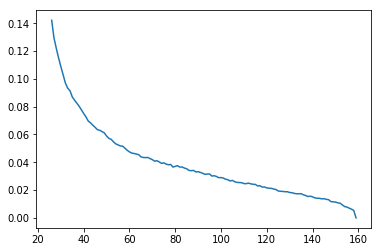

In [5]:
greedy_mtx = pd.read_csv('greedy_mtx.csv', index_col=0)
greedy_mtx.columns = greedy_mtx.columns.astype(int)
for col in greedy_mtx.columns:
    greedy_mtx[col].iloc[1] = literal_eval(greedy_mtx[col].iloc[1])
greedy_mtx.iloc[0] = greedy_mtx.iloc[0].apply(pd.to_numeric, errors='coerce')
greedy_mtx.iloc[2] = greedy_mtx.iloc[2].apply(pd.to_numeric, errors='coerce')

greedy_rels_mtx = pd.read_csv('greedy_rel_mtx_wish_orig.csv', index_col=0)
greedy_rels_mtx.columns = greedy_rels_mtx.columns.astype(int)
for col in greedy_rels_mtx.columns:
    greedy_rels_mtx[col].iloc[0] = literal_eval(greedy_rels_mtx[col].iloc[0])

sns.lineplot(data=greedy_mtx.iloc[0].astype(float))


## Random Iterations

### Use Wish relationships as seeds, but do not optimize for every step

In [ ]:
"""random_step_rels = wish_rels['Relationships'].tolist()
random_step_rels = [s.replace('\u2013', '-') for s in random_step_rels]
random_step_rels = [s.replace('\xe2\x80\x93', '-') for s in random_step_rels]
#greedy_step_rels = [s.replace('–', '-') for s in greedy_step_rels]


# Matrix that stores mean KS stat for a given seed and greedy level
random_orig_mtx = pd.DataFrame(np.nan, columns = range(26,160), index=range(1,10001))
# The relationships that were choosen in a "greedy" manner
#random_rels_mtx = pd.DataFrame(np.nan, columns = range(26,160), index=range(1,10001))
#random_allks_mtx = pd.DataFrame(np.nan, columns = range(26,160), 
#                                index=range(1,10001), dtype=object)


# Exclude seed and rels that have already been selected
#other_rels = [x for x in relationships if x not in random_step_rels]
#count = 1
random_lowest_step_kstat = pd.DataFrame(1, columns=range(26,160), 
                                        index=['mean','all'], dtype=object)
 
for i in range(1,10001):
    random_step_rels = wish_rels['Relationships'].tolist()
    random_step_rels = [s.replace('\u2013', '-') for s in random_step_rels]
    random_step_rels = [s.replace('\xe2\x80\x93', '-') for s in random_step_rels]
    other_rels = [x for x in relationships if x not in random_step_rels]
    for step in range(26,160):  # Loop through increasing greedy levels
        #greedy_norm_mtx[str(max_step)] = np.nan
        #greedy_rels_mtx[str(max_step)] = np.nan
        prev_mean = 1
        step_kstats = []
        rel = random.choice(other_rels)
        random_step_rels.append(rel)
        other_rels = [x for x in relationships if x not in random_step_rels]
        random_step_kstat = []
        random_step_pval = []
        for dim in dimensions:  # Calc the KS stat for each dimension
            temp_mean, temp_pval = stats.ks_2samp(dim_rel_t.loc[random_step_rels,dim],dim_rel_t[dim])
            #greedy_step_kstat.append(stats.ks_2samp(dim_rel_t.loc[temp_rels,dim],dim_rel_t[dim])[0])
            #greedy_step_pval.append(stats.ks_2samp(dim_rel_t.loc[temp_rels,dim],dim_rel_t[dim])[1])
            random_step_kstat.append(temp_mean)
            random_step_pval.append(temp_pval)
        # Find the average KS stat of all dimensions
        random_step_kstat_avg = mean(random_step_kstat)   
        random_step_pval_avg = mean(random_step_pval)
        #step_kstats.append(random_step_kstat_avg)
        
        if random_step_kstat_avg < random_lowest_step_kstat[step].loc['mean']:
            random_lowest_step_kstat[step].loc['mean'] = random_step_kstat_avg
            random_lowest_step_kstat[step].loc['all'] = random_step_kstat[:]
    
        random_orig_mtx[step].loc[i] = random_step_kstat_avg
        #random_allks_mtx[step].loc[i] = random_step_kstat[:]
        #greedy_norm_mtx[step].iloc[1] = pval
        #random_rels_mtx[step].loc[i] = random_step_rels[:]
    print(i)
            #count = count 

sns.lineplot(data=greedy_mtx.iloc[0].astype(float))
for i in random_orig_mtx.index[:100]:
    sns.lineplot(data=random_orig_mtx.iloc[i])


#random_lowest_step_kstat.to_csv('random_lowest_step_kstat_10k.csv')
#random_orig_mtx.to_csv('random_orig_mtx.csv')
"""

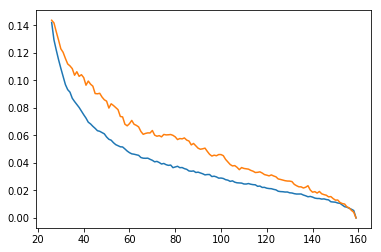

In [7]:
random_lowest_step_kstat = pd.read_csv('random_lowest_step_kstat_10k.csv', 
                                       index_col=0, dtype=object)
for col in random_lowest_step_kstat.columns:
    random_lowest_step_kstat[col].iloc[1] = literal_eval(random_lowest_step_kstat[col].iloc[1])
#random_lowest_step_kstat.iloc[0] = random_lowest_step_kstat.iloc[0].apply(pd.to_numeric, errors='coerce')
random_lowest_step_kstat.columns = random_lowest_step_kstat.columns.astype(int)
random_orig_mtx = pd.read_csv('random_orig_mtx.csv', index_col=0)
random_orig_mtx = random_orig_mtx.apply(pd.to_numeric, errors='coerce')
random_orig_mtx.columns = random_orig_mtx.columns.astype(int)



sns.lineplot(data=greedy_mtx.iloc[0].astype(float))
sns.lineplot(data=random_lowest_step_kstat.iloc[0].astype(float))


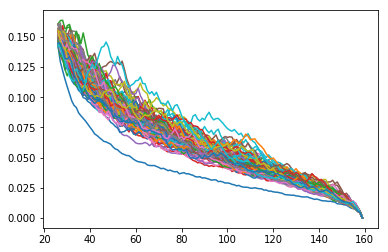

In [8]:
sns.lineplot(data=greedy_mtx.iloc[0].astype(float))
for i in random_orig_mtx.index[:100]:
    sns.lineplot(data=random_orig_mtx.iloc[i])


## PCA analysis on subsample, and excluded sample

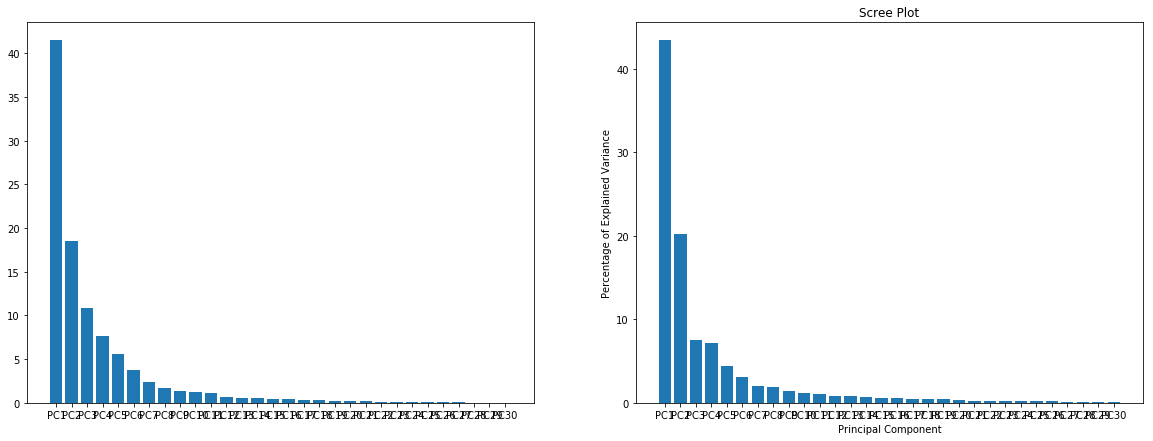

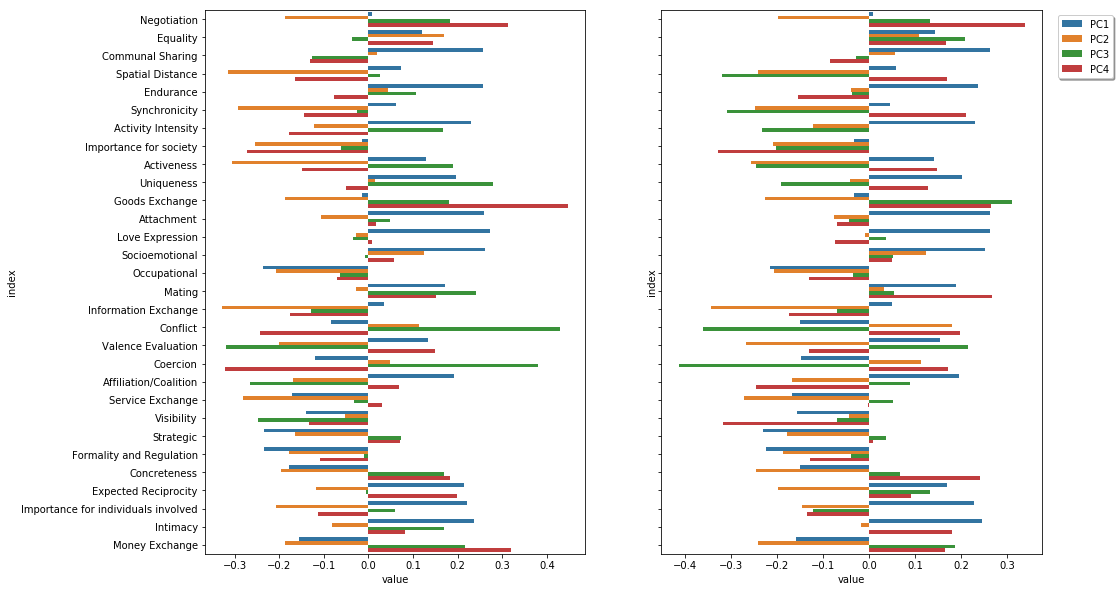

In [15]:
relationships_subsample = greedy_rels_mtx[42][0]
dim_rel_scaled = preprocessing.scale(dim_rel[relationships_subsample].transpose())

# Create PCA object and fit
#   Do all the PCA math like calculate loading scores and the variation of each component
pca = PCA()
pca.fit(dim_rel_scaled)

# Generate coordinates
pca_data_sub = pca.transform(dim_rel_scaled)


# Scree plot
#   Calculate % of variance that each component accounts for
per_var_sub = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels_sub = ['PC' + str(x) for x in range(1, len(per_var_sub)+1)]
#plt.figure(figsize=(20,7))
#plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
#plt.ylabel('Percentage of Explained Variance')
#plt.xlabel('Principal Component')
#plt.title('Scree Plot')
#plt.show()
#plt.savefig("results/pca_screeplot.png")

pca_df_sub = pd.DataFrame(pca_data_sub, columns=labels_sub, index=relationships_subsample)


# Look at the loading scores
loading_scores_sub = pd.DataFrame(pca.components_.T, columns=pca_df_sub.columns, index=dim_rel.index)
loading_scores_sub.to_csv('pca_loading_scores_sub.csv')

pca_plot_data_sub = pd.melt(loading_scores_sub[['PC1','PC2','PC3','PC4']].reset_index(), id_vars='index')

#plt.figure(figsize=(15,15))
#sns.barplot(x='value', y='index', hue='variable', data=pca_plot_data)
#plt.savefig("results/pca_loadings.png")




relationships_excluded = [item for item in relationships if item not in relationships_subsample]
dim_rel_scaled_ex = preprocessing.scale(dim_rel[relationships_excluded].transpose())

# Create PCA object and fit
#   Do all the PCA math like calculate loading scores and the variation of each component
pca_ex = PCA()
pca_ex.fit(dim_rel_scaled_ex)

# Generate coordinates
pca_data_ex = pca.transform(dim_rel_scaled_ex)


# Scree plot
#   Calculate % of variance that each component accounts for
per_var_ex = np.round(pca_ex.explained_variance_ratio_*100, decimals=1)
labels_ex = ['PC' + str(x) for x in range(1, len(per_var_ex)+1)]
#plt.figure(figsize=(20,7))
#plt.bar(x=range(1,len(per_var_ex)+1), height=per_var_ex, tick_label=labels)
#plt.ylabel('Percentage of Explained Variance')
#plt.xlabel('Principal Component')
#plt.title('Scree Plot')
#plt.show()
#plt.savefig("results/pca_screeplot.png")

pca_df_ex = pd.DataFrame(pca_data_ex, columns=labels_ex, index=relationships_excluded)


# Look at the loading scores
loading_scores_ex = pd.DataFrame(pca_ex.components_.T, columns=pca_df_ex.columns, index=dim_rel.index)
loading_scores_ex.to_csv('pca_loading_scores_ex.csv')

pca_plot_data_ex = pd.melt(loading_scores_ex[['PC1','PC2','PC3','PC4']].reset_index(), id_vars='index')

#plt.figure(figsize=(15,15))
#sns.barplot(x='value', y='index', hue='variable', data=pca_plot_data_ex)
#plt.savefig("results/pca_loadings.png")


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.bar(x=range(1,len(per_var_sub)+1), height=per_var_sub, tick_label=labels_sub)
ax2.bar(x=range(1,len(per_var_ex)+1), height=per_var_ex, tick_label=labels_ex)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


f, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
#sns.despine(left=True)
sns.barplot(x='value', y='index', hue='variable', data=pca_plot_data_sub, ax=axes[0])
sns.barplot(x='value', y='index', hue='variable', data=pca_plot_data_ex, ax=axes[1])
axes[1].legend(loc='upper right', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
axes[0].get_legend().remove()
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)



Text(0.5,1,'All')

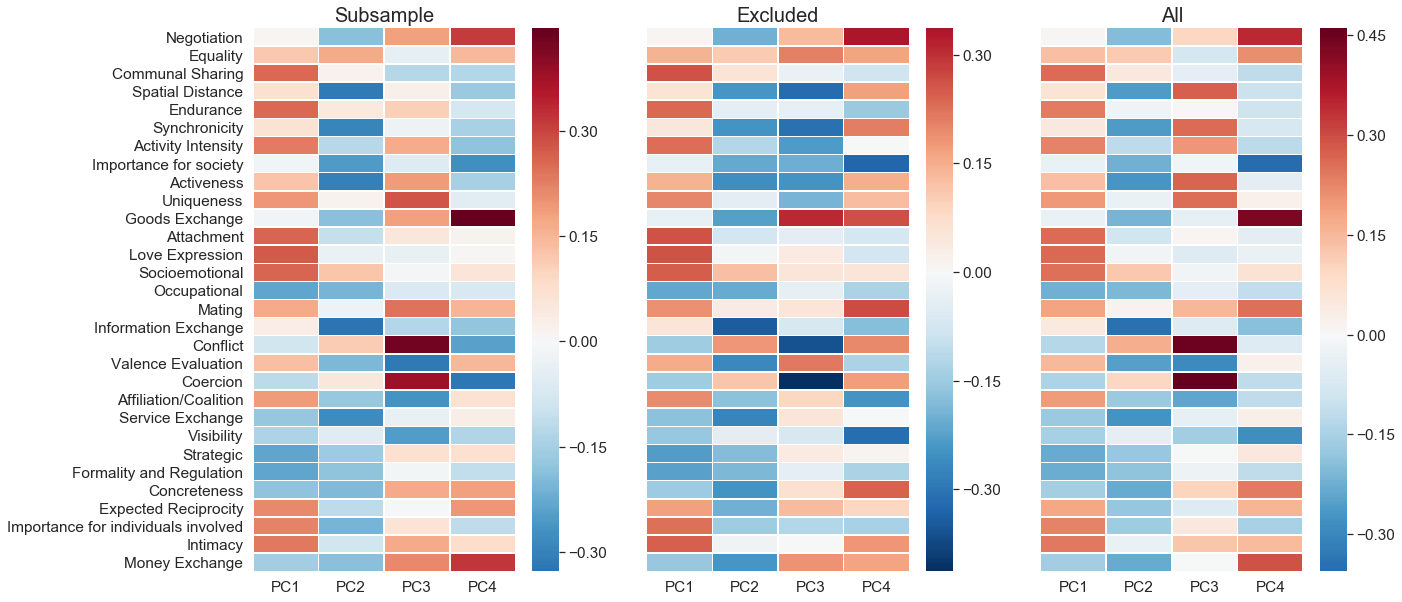

In [40]:
loading_scores_all = pd.read_csv('../../surveys/lit_dimensions_all_relationships/results/pca_loading_scores.csv',index_col=0)


#heatmap = sns.heatmap(loading_scores_ex[['PC1','PC2','PC3','PC4']],cmap="RdBu_r",linewidths=.5)

f, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
#sns.despine(left=True)
sns.set(font_scale=1.4)
sns.heatmap(loading_scores_sub[['PC1','PC2','PC3','PC4']],cmap="RdBu_r",linewidths=.5,center=0,ax=axes[0])
sns.heatmap(loading_scores_ex[['PC1','PC2','PC3','PC4']],cmap="RdBu_r",linewidths=.5,center=0,ax=axes[1])
sns.heatmap(loading_scores_all[['PC1','PC2','PC3','PC4']],cmap="RdBu_r",linewidths=.5,center=0,ax=axes[2])
axes[0].set_title('Subsample',fontsize=20)
axes[1].set_title('Excluded',fontsize=20)
axes[2].set_title('All',fontsize=20)

#axes[0].get_legend().remove()
#axes[1].get_legend().remove()
#axes[2].legend(loc='upper right', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)


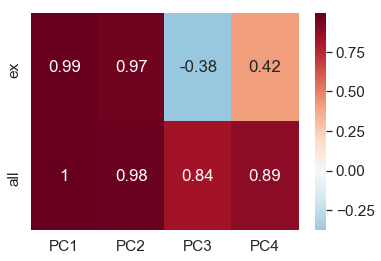

In [69]:
loading_corrs_sub = pd.DataFrame(np.nan, columns=['PC1','PC2','PC3','PC4'], index=['ex','all'])
for pc in ['PC1','PC2','PC3','PC4']:
    loading_corrs_sub[pc].loc['ex'] = np.correlate(loading_scores_sub[pc], loading_scores_ex[pc])
    loading_corrs_sub[pc].loc['all'] = np.correlate(loading_scores_sub[pc], loading_scores_all[pc])
#loading_corrs_sub
sns.heatmap(loading_corrs_sub, annot=True, cmap="RdBu_r",center=0)

In [67]:
np.abs(loading_scores_sub[pc])

Negotiation                            0.311859
Equality                               0.144905
Communal Sharing                       0.130479
Spatial Distance                       0.164644
Endurance                              0.076919
Synchronicity                          0.144174
Activity Intensity                     0.178307
Importance for society                 0.271879
Activeness                             0.148808
Uniqueness                             0.050396
Goods Exchange                         0.447023
Attachment                             0.015908
Love Expression                        0.007444
Socioemotional                         0.057552
Occupational                           0.070860
Mating                                 0.151518
Information Exchange                   0.175960
Conflict                               0.242062
Valence Evaluation                     0.149953
Coercion                               0.321239
Affiliation/Coalition                  0

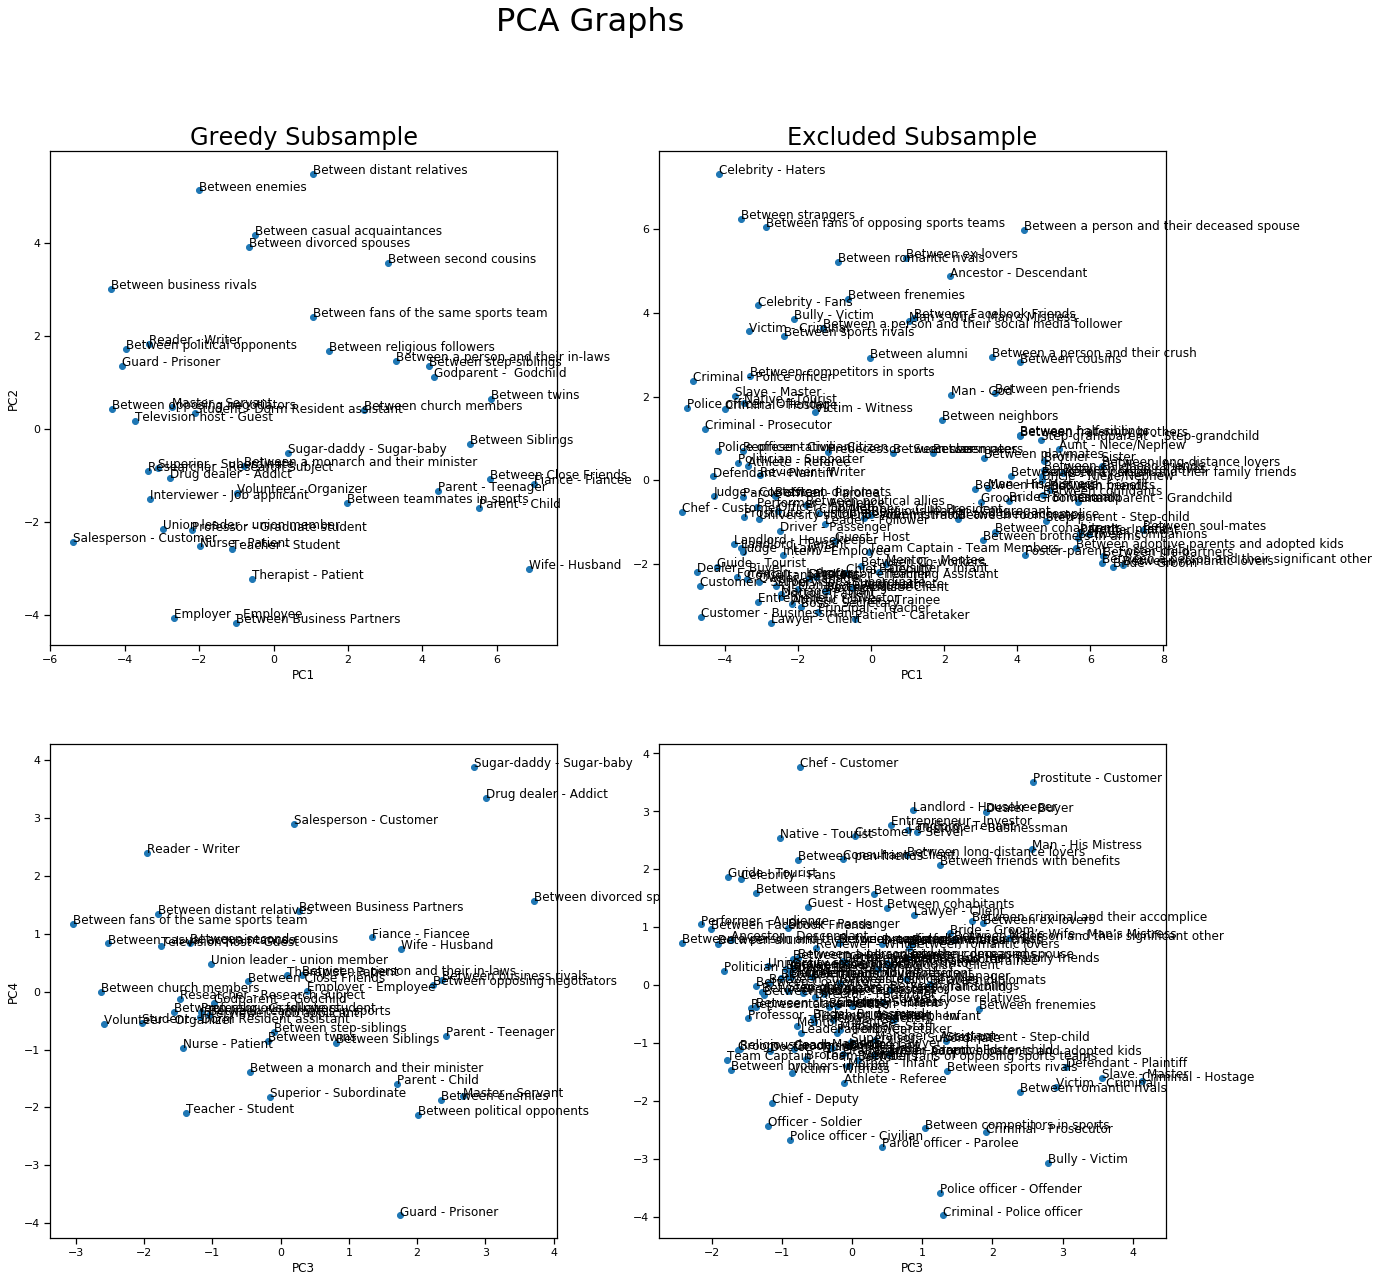

In [204]:

pca_sub_ex_data = pd.concat([pca_df, pca_df_ex])
pca_sub_ex_data['subsample'] = [1] * len(pca_df) + [0] * len(pca_df_ex)

#pca_sub_ex_data = pd.concat([pca_df, pca_df_ex])
#pca_sub_ex_data['subsample'] = [1] * len(pca_df) + [0] * len(pca_df_ex)

f, axes = plt.subplots(2, 2, figsize=(20, 20))
plt.rcParams.update({'font.size': 12})

axes[0,0].scatter(pca_df.PC1, pca_df.PC2)
for sample in pca_df.index:
    axes[0,0].annotate(sample.decode('utf-8'), (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

axes[0,1].scatter(pca_df_ex.PC1, pca_df_ex.PC2)
for sample in pca_df_ex.index:
    axes[0,1].annotate(sample.decode('utf-8'), (pca_df_ex.PC1.loc[sample], pca_df_ex.PC2.loc[sample]))

axes[1,0].scatter(pca_df.PC3, pca_df.PC4)
for sample in pca_df.index:
    axes[1,0].annotate(sample.decode('utf-8'), (pca_df.PC3.loc[sample], pca_df.PC4.loc[sample]))

axes[1,1].scatter(pca_df_ex.PC3, pca_df_ex.PC4)
for sample in pca_df_ex.index:
    axes[1,1].annotate(sample.decode('utf-8'), (pca_df_ex.PC3.loc[sample], pca_df_ex.PC4.loc[sample]))

f.suptitle('PCA Graphs',fontsize=32)
axes[0,0].set_title('Greedy Subsample',fontsize=24)
axes[0,1].set_title('Excluded Subsample',fontsize=24)
axes[0,0].set(xlabel='PC1', ylabel='PC2')
axes[0,1].set(xlabel='PC1', ylabel='')
axes[1,0].set(xlabel='PC3', ylabel='PC4')
axes[1,1].set(xlabel='PC3', ylabel='')
plt.show()

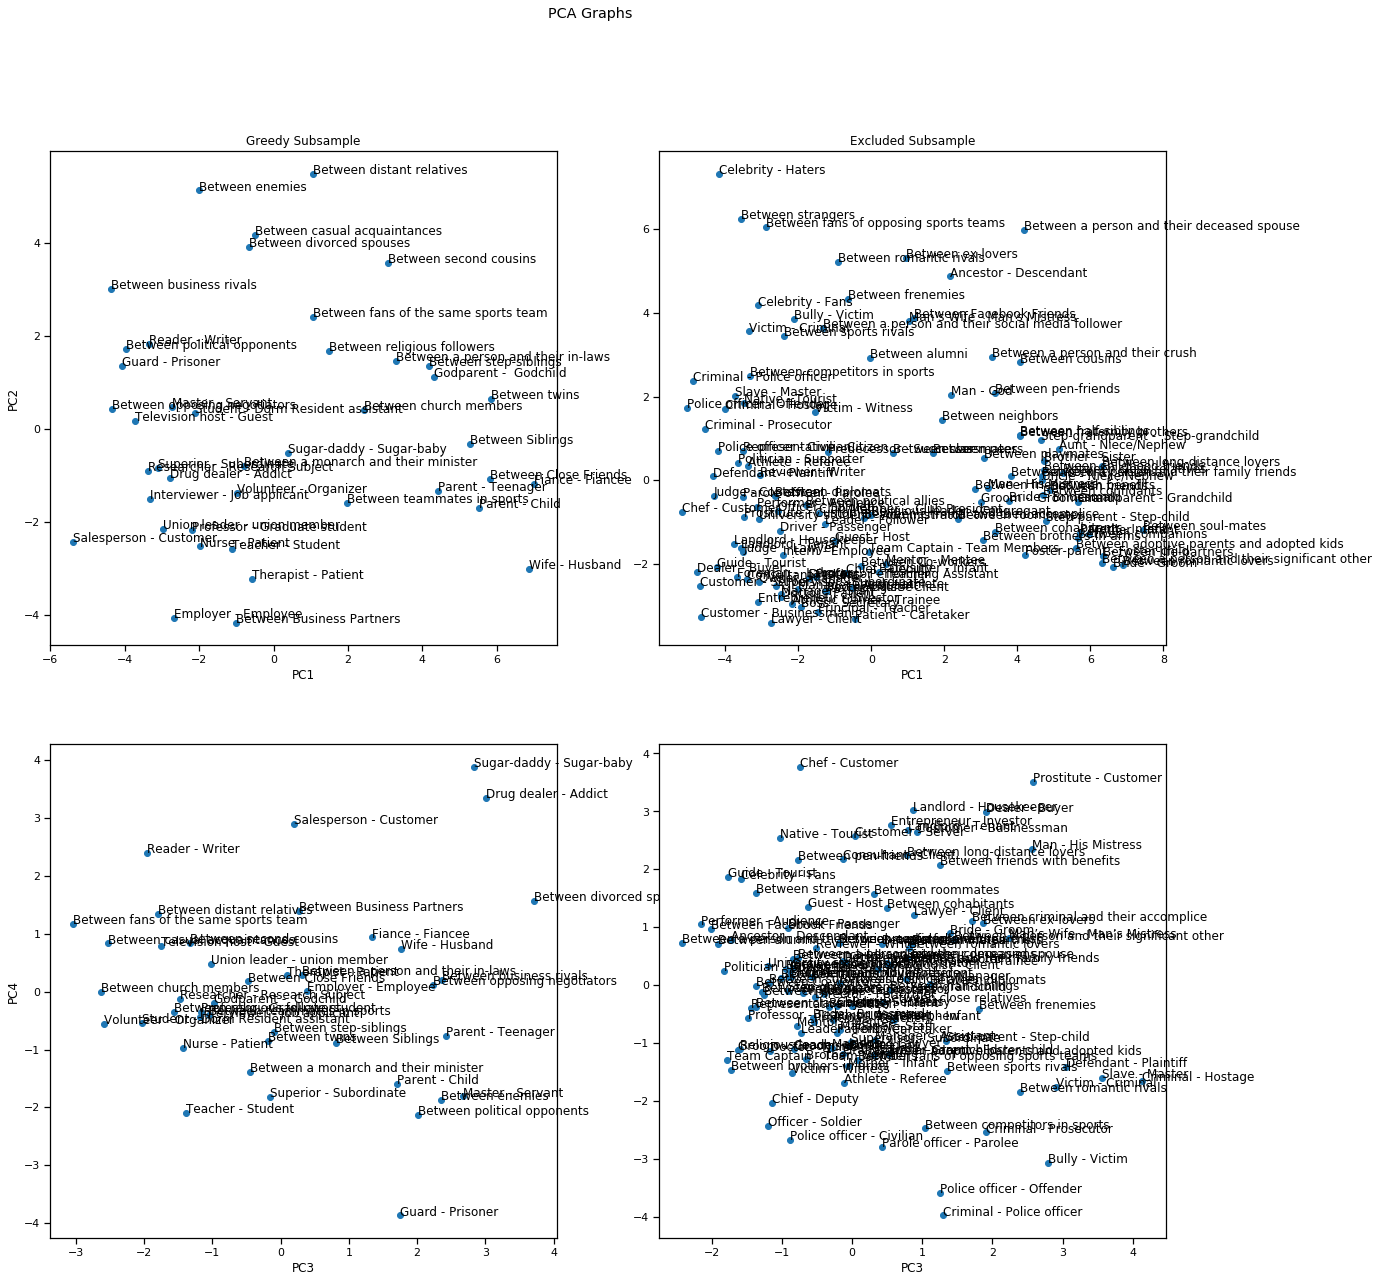

In [185]:

stats.ttest_rel(loading_scores['PC1'],loading_scores_ex['PC1'])


from statsmodels.stats.anova import AnovaRM
anova_df = loading_scores[loading_scores.columns[:4]].append(loading_scores_ex[loading_scores_ex.columns[:4]], sort=False)
anova_df = anova_df.append(loading_scores_all[loading_scores_ex.columns[:4]], sort=False)
anova_df['subsample'] = ['sub'] * 30 + ['ex'] * 30 + ['all'] * 30
anova_df.reset_index(level=0, inplace=True)
anova_df.rename(columns={'index':'dimension'}, inplace=True)
anova_df.to_csv('anova_df.csv')

for pc in ['PC1','PC2','PC3','PC4']:
    aovrm = AnovaRM(anova_df, pc, 'dimension', within=['subsample'])
    res = aovrm.fit()
    print(res)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
subsample  0.4962 2.0000 58.0000 0.6114

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
subsample  0.1468 2.0000 58.0000 0.8638

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
subsample  2.3032 2.0000 58.0000 0.1090

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
subsample  0.7182 2.0000 58.0000 0.4919

